## Credit Rating Prdeiction- Classification Models using Logistic Regression and Naive Bayes
### Background

The German Credit Card data set is for customers of a financial institution who have been labeled as “good” or “bad” credit risks (in fact: whether they repaid the loan or did not repay the loan). The dataset contains 21 attributes (20 predictors and one dependent variable) and 1000 instances, with no missing values (the data are real, but were cleaned up before being put into the archive). The specification of these attributes is given in the document `german.doc`.

We will build two classification models using logistic regression and naive bayes to report their performance metrics. We will use the first 800 rows as the training data and the rest of the data for testing.

In [1]:
# load libraries
## The followings are just suggestions.
## You may choose to use different libraries
library(caret) # for confusion matrix and other stats
library(e1071) # for naiveBayes
library(ROCR)
library(ggplot2)

# load data
df = read.table("german.data")

Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'e1071' was built under R version 3.4.4"Warning message:
"package 'ROCR' was built under R version 3.4.4"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.4.4"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [2]:
# Let's have a look at the data set.

head(df,2)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21
A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2


In [3]:
# We change the variable names to more meaningful names

colnames(df) <- c('status_checking_acct', 'duration_months', 'credit_hist', 'purpose', 'credit_amt', 'savings_acct',
                       'employment', 'installment_rate', 'sex_status', 'other_debtors', 'residence', 'property', 'age',
                       'other_installment_plans', 'housing', 'existing_crdits', 'job', 'liability_to_other_people',
                       'telephone', 'foreign_worker', 'credit_risk'
                      )

In [4]:
# we check that our changes has been applied successfully and inspect the structure of the data

str(df)

'data.frame':	1000 obs. of  21 variables:
 $ status_checking_acct     : Factor w/ 4 levels "A11","A12","A13",..: 1 2 4 1 1 4 4 2 4 2 ...
 $ duration_months          : int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_hist              : Factor w/ 5 levels "A30","A31","A32",..: 5 3 5 3 4 3 3 3 3 5 ...
 $ purpose                  : Factor w/ 10 levels "A40","A41","A410",..: 5 5 8 4 1 8 4 2 5 1 ...
 $ credit_amt               : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_acct             : Factor w/ 5 levels "A61","A62","A63",..: 5 1 1 1 1 5 3 1 4 1 ...
 $ employment               : Factor w/ 5 levels "A71","A72","A73",..: 5 3 4 4 3 3 5 3 4 1 ...
 $ installment_rate         : int  4 2 2 2 3 2 3 2 2 4 ...
 $ sex_status               : Factor w/ 4 levels "A91","A92","A93",..: 3 2 3 3 3 3 3 3 1 4 ...
 $ other_debtors            : Factor w/ 3 levels "A101","A102",..: 1 1 1 3 1 1 1 1 1 1 ...
 $ residence                : int  4 2 3 4 4 4 4 2 4 2 ...
 $ property         

In [5]:
# We change credit risk response variable values from 1 and 2 to 0 and 1, respectively.

df$credit_risk[df$credit_risk == 1] <- 0 # change 1 to 0
df$credit_risk[df$credit_risk == 2] <- 1 # change 2 to 1

In [6]:
# we check that the values has been updated successfully.

str(df$credit_risk, 2)

 num [1:1000] 0 1 0 0 1 0 0 0 0 1 ...


In [7]:
# we change the levels to more meaningful names 

df$credit_risk <- as.factor(df$credit_risk)
levels(df$credit_risk) <- c('Good Credit Risk', 'Bad Credit Risk')

### Task 1.1:
We will build a logistic regression and a naive bayes model using all predictors. We will report their efficiency regarding precision, recall, and F1 score using the test data. We will compare the two models and explain our findings.

In [8]:
# we divide the data set into 2, a training set and a test set

trainSet = df[1:800, ]
testSet = df[801:1000, ]

### Logistic regression model using all predictors

**Model Building and Training**

In [9]:
# building the logistic regression model
# we will use the train() function from the caret library to build and train our logistic regression model
#  the first argument 'crdit_risk' is our response variable and '.' denotes that we want to use all other variables as predictors
#  the second argument 'trainSet' is the data we would like to use to train our model,
#  the third argument 'method = glm' tells the function the we would like to use generalised linear models
#  and the last argument 'family = binomial' tells the function that we would like to use logistic regression

logistic_model <- train(credit_risk ~ ., data = trainSet, method = 'glm', family = binomial)

**Model Testing**

In [10]:
# Testing the model predict() function
#  the first argument is the model type
#  the secind arguments is the test data

logistic_predict <- predict(logistic_model, newdata=testSet)

<br>
**Model Metrics/ Efficiency**

In [11]:
# we build a confusion matrix based on actual testSet data and the prediction data

confusion.matrix <- as.matrix(table('Actual'=testSet$credit_risk, 'Predicted'=logistic_predict))
confusion.matrix

                  Predicted
Actual             Good Credit Risk Bad Credit Risk
  Good Credit Risk              115              24
  Bad Credit Risk                29              32

We see from the confusion matrix that 115 of good credit risk and 32 of bad credit risk observations were correctly predicted.<br> 115 + 24 represents True Positive (TP) and 29 + 32 represents True Negative (TN).<br>
On the other hand, 29 bad credit risk and 24 good credit risk observations were incorrectly predicted.<br>
29 represents False Positive (FP) and 24 represents False Negative (FN).<br><br>

**Calculate Precision**<br><br>
$Precision = \frac{True\space Positives}{True\space Positives + False\space Positives}$

In [12]:
# true positive from confusion matrix

tp <- sum(confusion.matrix[1,])

# true positives + false positives from confusion matrix 

tp_fp <- sum(confusion.matrix[1,], confusion.matrix[2,1])

# compute the precision from above formula for precision

precision <- tp / tp_fp
paste('Precision metric of our logistic regression model =', round(precision, 4))

[1] "Precision metric of our logistic regression model = 0.8274"

0.8274 of all samples predicted by our model as positive were really positive.<br><br>

**Calculate Recall**<br><br>
$Recall = \frac{True\space Positives}{True\space Positives + False\space Negatives}$

In [13]:
# true positives + false negatives

tp_fn <- sum(confusion.matrix[1,], confusion.matrix[1,2])

# compute recall from above formula

recall <- tp / tp_fn
paste('Recall metric of our logistic regression model =', round(recall, 4))

[1] "Recall metric of our logistic regression model = 0.8528"

0.8528 of all positive samples were predicted positive by our model.<br><br>

**Calculate F Score**<br><br>
$F1= 2\times\frac{precision \space\times\space recall}{precision\space+ \space recall}$

In [14]:
# compute F score from above formula
f1 <- 2 * (precision * recall) / (precision + recall)
paste('F Score of our logistic regression model =', round(f1, 4))

[1] "F Score of our logistic regression model = 0.8399"

### Naive Bayes Model

**Model Building and Training**

In [15]:
# Building the Naive Bayes model
# we use tthe naiveBayes()function from the e1071 library to build our model
# the first argument 'crdit_risk' is our response variable and '.' denotes that we want to use all other variables as predictors
# the second argument is the training data

nb_model <- naiveBayes(credit_risk ~ ., data = trainSet)

**Model Testing**

In [16]:
# Testing the model predict() function
#  the first argument is the model type
#  the secind arguments is the test data 

nb_predict <- predict(nb_model, testSet)

**Model Metrics/ Efficiency**

In [17]:
# we build a confusion matrix based on actual testSet data and the prediction data

confusion.matrix <- as.matrix(table('Actual'=testSet$credit_risk, 'Predicted'=nb_predict))
confusion.matrix

                  Predicted
Actual             Good Credit Risk Bad Credit Risk
  Good Credit Risk              122              17
  Bad Credit Risk                25              36

We see from the confusion matrix that 122 of good credit risk and 36 of bad credit risk observations were correctly predicted.<br>
122 + 17 represents True Positive (TP) and 15 + 36 represents True Negative (TN).<br>
On the other hand, 17 good credit risk and 25 bad credit risk observations were incorrectly predicted.<br>
25 represents False Positive (FP) and 17 represents False Negative (FN).<br><br>

**Calculate Precision**<br><br>
$Precision = \frac{True\space Positives}{True\space Positives + False\space Positives}$

In [18]:
# true positive from confusion matrix

tp <- sum(confusion.matrix[1,])

# true positives + false positives from confusion matrix 

tp_fp <- sum(confusion.matrix[1,], confusion.matrix[2,1])

# compute the precision from above formula

precision <- tp / tp_fp
paste('Precision metric of our naive bayes model =', round(precision, 4))

[1] "Precision metric of our naive bayes model = 0.8476"

0.8476 of all samples predicted by our model as positive were really positive.<br><br>

**Calculate Recall**<br><br>
$Recall = \frac{True\space Positives}{True\space Positives + False\space Negatives}$

In [19]:
# true positives + false negatives

tp_fn <- sum(confusion.matrix[1,], confusion.matrix[1,2])

# compute recall from above formula

recall <- tp / tp_fn
paste('Recall metric of our naive bayes model =', round(recall, 4))

[1] "Recall metric of our naive bayes model = 0.891"

0.891 of all positive samples were predicted positive by our model.<br><br>

**Calculate F score**<br><br>
$F1= 2\times\frac{precision \space\times\space recall}{precision\space+ \space recall}$

In [20]:
# compute F score from above formula

f1 <- 2 * (precision * recall) / (precision + recall)
paste('F Score of our naive bayes model =', round(f1, 4))

[1] "F Score of our naive bayes model = 0.8688"

<br>
** Comparison of the two models and our findings **

|Metric|Logistic Regression model|Naive Bayes Model|
|---------|-----------------|-------------------------|
|Precision|0.8274|0.8476|
|Recall   |0.8528|0.8910|
|F Score  |0.8399|0.8688|

We see from the metric comparison table above that the Naive Bayes Model is more efficient compared to Logistic Regression when we use all the features that are available in our data set.<br>
* Our naive bayes model has better precision compared to our logistic regression model since 0.8476 of the samples predicted by our naive bayes model as 'Good credit risks' were really 'Good credit risks' compared to that of our logistic regression model which is only 0.8274.
* Our naive bayes model has better recall compared to our logistic regression model since 0.8910 of all 'Good credit risks' samples were predicted as 'Good credit risks' compared to our logistic regression model which is only 0.8528.
* Consequently, since both precision and recall of our naive bayes model is higher than our logistic regression model, the F-score of our naive bayes model is also better than that of our logistic regression model, with 0.8688 for naive bayes and 0.8399 for logistic regression.<br>

### Task 1.2:
Based on the summaries of the two models built in (1), we will select a subset of
variables that could achieve the same or better performance (in one or more metrics) than the model made above using all predictors. We will then report the new models' performance regarding precision, recall, and F1 score. We will also discuss why having a model with less number of attributes is beneficial.

### Improving logistic regression  model by selecting features that are more significant, by using p-values <= 0.05
Based on the summary of the logistic regression model that we built earlier, we look at the p-values to select features that are more significant than the others.
<br>There are functions that can be used such as varImp() that automatically selects important features but we will not use these automated methods.
<br>

Reference: Bursac, Z., Gauss, C. H., Williams, D. K., & Hosmer, D. W. (2008). Purposeful selection of variables in logistic regression. Source Code for Biology and Medicine, 3, 17. http://doi.org/10.1186/1751-0473-3-17

In [21]:
# we get the features whose p-values are < 0.05 from the output of the summary() function for our logistic regression model

(summary(logistic_model)$coef[,'Pr(>|z|)'])[(summary(logistic_model)$coef[,'Pr(>|z|)'] < 0.05)]

status_checking_acctA13 status_checking_acctA14         duration_months 
           2.056653e-02            1.016001e-10            5.479164e-03 
         credit_histA34              purposeA41              purposeA42 
           2.439942e-03            3.463831e-05            1.726545e-03 
             purposeA43              purposeA49              credit_amt 
           1.235777e-03            2.975966e-02            2.768230e-02 
        savings_acctA64         savings_acctA65           employmentA74 
           2.559154e-02            1.546156e-02            3.062280e-02 
       installment_rate           sex_statusA93 
           2.874388e-04            3.769420e-03

In [22]:
# we will start to build an improved logistic model based on variables above
# we then remove each variable at a time to see how the efficiency is affected.
# we find that further removing 'sex_status' in the model improved the metrics so we also excluded it in our improved model

improved_logistic_model <- train(credit_risk ~ status_checking_acct + duration_months + credit_hist + purpose +
                                   credit_amt + savings_acct + employment + installment_rate,
                                   data = trainSet, method = 'glm', family = binomial)

In [23]:
# testing the model

improved_logistic_predict <- predict(improved_logistic_model, newdata=testSet)

In [24]:
# let us look at the confusion matrix

confusion.matrix <- as.matrix(table('Actual'=testSet$credit_risk, 'Predicted' = improved_logistic_predict))
confusion.matrix

                  Predicted
Actual             Good Credit Risk Bad Credit Risk
  Good Credit Risk              121              18
  Bad Credit Risk                30              31

In [25]:
### compute the metrics

# true positive
tp <- sum(confusion.matrix[1,])

# true positives + false positives
tp_fp <- sum(confusion.matrix[1,], confusion.matrix[2,1])

# compute the precision from above formula
precision <- tp / tp_fp
paste('Precision metric of our improved logistic regression model =', round(precision, 4))

# true positives + false negatives
tp_fn <- sum(confusion.matrix[1,], confusion.matrix[1,2])

# compute recall from above formula
recall <- tp / tp_fn
paste('Recall metric of our improved logistic regression model =', round(recall, 4))

# compute F score from above formula
f1 <- 2 * (precision * recall) / (precision + recall)
paste('F Score of our improved logistic regression model =', round(f1, 4))

[1] "Precision metric of our improved logistic regression model = 0.8225"

[1] "Recall metric of our improved logistic regression model = 0.8854"

[1] "F Score of our improved logistic regression model = 0.8528"

|Metric|Original Logistic Regression model|Improved Logistic Regression Model|
|---------|-----------------|-------------------------|
|Precision|0.8274|0.8225|
|Recall   |0.8528|0.8854|
|F Score  |0.8399|0.8528|

We can see from the above table that by selecting a subset of the available features based on p-values < 0.05 that our logistic model has improved recall from 0.8528 to 0.8854, as well as F score from 0.8399	to 0.8528.<br>
However, the precision metric went lower, meaning the model has become more pessimistic with more false negatives.

### Improving logistic regression model efficiency by adding more features with 0.05 > p-values <  0.1

In [26]:
# we try to improve the model by including more features. we increase the p-value threshold from 0.05 to 0.1

(summary(logistic_model)$coef[,'Pr(>|z|)'])[(summary(logistic_model)$coef[,'Pr(>|z|)'] <= 0.1)]

status_checking_acctA13   status_checking_acctA14           duration_months 
             2.056653e-02              1.016001e-10              5.479164e-03 
           credit_histA33            credit_histA34                purposeA41 
             7.962672e-02              2.439942e-03              3.463831e-05 
              purposeA410                purposeA42                purposeA43 
             8.732650e-02              1.726545e-03              1.235777e-03 
               purposeA48                purposeA49                credit_amt 
             6.936459e-02              2.975966e-02              2.768230e-02 
          savings_acctA64           savings_acctA65             employmentA74 
             2.559154e-02              1.546156e-02              3.062280e-02 
         installment_rate             sex_statusA93         other_debtorsA103 
             2.874388e-04              3.769420e-03              5.342293e-02 
                      age liability_to_other_people        foreign_workerA202 
             7.668175e-02              7.597165e-02              6.377945e-02

In [27]:
# we build a new model with additional features; foreign_worker, other_debtors and liability_to_other_people 
#  with 0.05 > p-values < 0.1.
#  exluding age, will further improve recall but we will include it since it will improve precision while maintaining recall
#  this model will improve all metrics compared to the original model with all features

improved_logistic_model_2 <- train(credit_risk ~ status_checking_acct + duration_months + credit_hist + purpose +
                                   credit_amt + savings_acct + employment + installment_rate + foreign_worker +
                                   other_debtors + liability_to_other_people + age,
                                   data = trainSet, method = 'glm', family = binomial)

In [28]:
# testing the model

improved_logistic_predict_2 <- predict(improved_logistic_model_2, newdata=testSet)

In [29]:
# let us look at the confusion matrix

confusion.matrix <- as.matrix(table('Actual'=testSet$credit_risk, 'Predicted' = improved_logistic_predict_2))
confusion.matrix

                  Predicted
Actual             Good Credit Risk Bad Credit Risk
  Good Credit Risk              121              18
  Bad Credit Risk                27              34

In [30]:
# compute the metrics

# true positive
tp <- sum(confusion.matrix[1,])

# true positives + false positives
tp_fp <- sum(confusion.matrix[1,], confusion.matrix[2,1])

# compute the precision from above formula
precision <- tp / tp_fp
paste('Precision metric of our improved logistic regression model =', round(precision, 4))

# true positives + false negatives
tp_fn <- sum(confusion.matrix[1,], confusion.matrix[1,2])

# compute recall from above formula
recall <- tp / tp_fn
paste('Recall metric of our improved logistic regression model =', round(recall, 4))

# compute F score from above formula
f1 <- 2 * (precision * recall) / (precision + recall)
paste('F Score of our improved logistic regression model =', round(f1, 4))

[1] "Precision metric of our improved logistic regression model = 0.8373"

[1] "Recall metric of our improved logistic regression model = 0.8854"

[1] "F Score of our improved logistic regression model = 0.8607"

|Metric|Original Logistic Regression model|Improved Logistic Regression Model| Improved Logistic Regression model 2|
|---------|-----------------|-------------------------|----------------------|
|Precision|0.8274|0.8225|0.8373|
|Recall   |0.8528|0.8854|0.8854|
|F Score  |0.8399|0.8528|0.8607|

We see that we were able to improve the model further by selecting features that are significant, then dropping features and observing the effect to the metric, keeping only the features that improved the model.<br>
We then add more features that has lower significance up to a p-value of 0.1, then again droppping features  and observing the effect to the metrics, keeping only the features that improved the model.<br>
We were able to improve all metrics from the original model with this method.<br>
* Precision	- from 0.8274 to 0.8373
* Recall    - from	0.8528 to 0.8854
* F Score   - from 0.8399	to 0.8607

### Improving the Naive Bayes model with selected features with p-values <= 0.05

In [31]:
# build and train the improved naive bayes model using selected features identified ealier
# we again exclude sex_status as it lowers the metrics further

improved_nb_model <- naiveBayes(credit_risk ~ status_checking_acct + duration_months + credit_hist + purpose +
                                credit_amt + savings_acct + employment + installment_rate,
                                data = trainSet)

In [32]:
# test our improved naive bayes model

improved_nb_predict <- predict(improved_nb_model, testSet)

In [33]:
# compute the confusion matrix

confusion.matrix <- as.matrix(table('Actual'=testSet$credit_risk, 'Predicted' = improved_nb_predict))
confusion.matrix

                  Predicted
Actual             Good Credit Risk Bad Credit Risk
  Good Credit Risk              124              15
  Bad Credit Risk                27              34

In [34]:
### compute the metrics

# true positive
tp <- sum(confusion.matrix[1,])

# true positives + false positives
tp_fp <- sum(confusion.matrix[1,], confusion.matrix[2,1])

# compute the precision from above formula
precision <- tp / tp_fp
paste('Precision metric of our improved naive bayes model =', round(precision, 4))

# true positives + false negatives
tp_fn <- sum(confusion.matrix[1,], confusion.matrix[1,2])

# compute recall from above formula
recall <- tp / tp_fn
paste('Recall metric of our improved naive bayes model =', round(recall, 4))

# compute F score from above formula
f1 <- 2 * (precision * recall) / (precision + recall)
paste('F Score of our improved naive bayes model =', round(f1, 4))

[1] "Precision metric of our improved naive bayes model = 0.8373"

[1] "Recall metric of our improved naive bayes model = 0.9026"

[1] "F Score of our improved naive bayes model = 0.8688"

|Metric|Original Naive Bayes model|Improved Naive Bayes Model|
|---------|-----------------|-------------------------|
|Precision|0.8476|0.8373|
|Recall   |0.8910|0.9026|
|F Score  |0.8688|0.8688|

We see from the table above that our naive bayes model's Recall metric improved after selecting only a subset of the features that we have for building the model. However, the precision metric went lower, meaning the model has become more pessimistic with more false negatives. The F Score remained the same.

### Improving the Naive Bayes model further by adding more features with 0.05 > p-values < 0.1

In [35]:
# we add features identified earlier to further improve the model
# we note that adding or removing age makes no difference so we excluded it for a more simple model

improved_nb_model_2 <- naiveBayes(credit_risk ~ status_checking_acct + duration_months + credit_hist + purpose +
                                credit_amt + savings_acct + employment + installment_rate + foreign_worker +
                                other_debtors + liability_to_other_people,
                                data = trainSet)

In [36]:
# test our improved naive bayes model

improved_nb_predict_2 <- predict(improved_nb_model_2, testSet)

In [37]:
# compute the confusion matrix

confusion.matrix <- as.matrix(table('Actual'=testSet$credit_risk, 'Predicted' = improved_nb_predict))
confusion.matrix

                  Predicted
Actual             Good Credit Risk Bad Credit Risk
  Good Credit Risk              124              15
  Bad Credit Risk                27              34

In [38]:
### compute the metrics

# true positive
tp <- sum(confusion.matrix[1,])

# true positives + false positives
tp_fp <- sum(confusion.matrix[1,], confusion.matrix[2,1])

# compute the precision from above formula
precision <- tp / tp_fp
paste('Precision metric of our improved naive bayes model =', round(precision, 4))

# true positives + false negatives
tp_fn <- sum(confusion.matrix[1,], confusion.matrix[1,2])

# compute recall from above formula
recall <- tp / tp_fn
paste('Recall metric of our improved naive bayes model =', round(recall, 4))

# compute F score from above formula
f1 <- 2 * (precision * recall) / (precision + recall)
paste('F Score of our improved naive bayes model =', round(f1, 4))

[1] "Precision metric of our improved naive bayes model = 0.8373"

[1] "Recall metric of our improved naive bayes model = 0.9026"

[1] "F Score of our improved naive bayes model = 0.8688"

|Metric|Original Naive Bayes model|Improved Naive Bayes Model|Improved Naive Bayes Model 2|
|---------|-----------------|-------------------------|---------|
|Precision|0.8476|0.8373|0.8373|
|Recall   |0.8910|0.9026|0.9026|
|F Score  |0.8688|0.8688|0.8688|

We see that by adding the same features that further improved the logistic regression model did not change the efficiency of the naive bayes model further.

### Comparison between improved Logistic Rergression models and improved Naive Bayes model

** Improved logistic regression and improved naive bayes model comparison**

|Metric|Improved Logistic Regression Model|Improved Logistic Regression Model 2|Improved Naive Bayes Model|Improved Naive Bayes Model 2|
|---------|-----------------|-------------------------|--------------|---------|
|Precision|0.8225|0.8373|0.8373|0.8373|
|Recall   |0.8854|0.8854|0.9026|0.9026|
|F Score  |0.8528|0.8607|0.8688|0.8688|

We see from the table above that the improved naive bayes model still has better performance compared to the improved logistic regression model as well as the further improved logistic regression model 2, although the precision of the naive based model decreased from the original model that has all features included. <br>

**Discuss why having a model with less number of attributes is beneficial**

A model with less number of attributes minimises over fitting, thus the model generalise better to unseen data.<br>
Additionally, there is less noise from irrelevant or redundant data that gets included in the model.<br>
Finally, the model trains faster since it has less features to include in the computation.

### Task 1.3:
We will plot a ROC curve for each of the models built in (2) and report its AUC then discuss our findings.

### Logistic Regression Model ROC Curve and AUC

[1] "Improved Logistic Regression model AUC = 0.713940323151315"

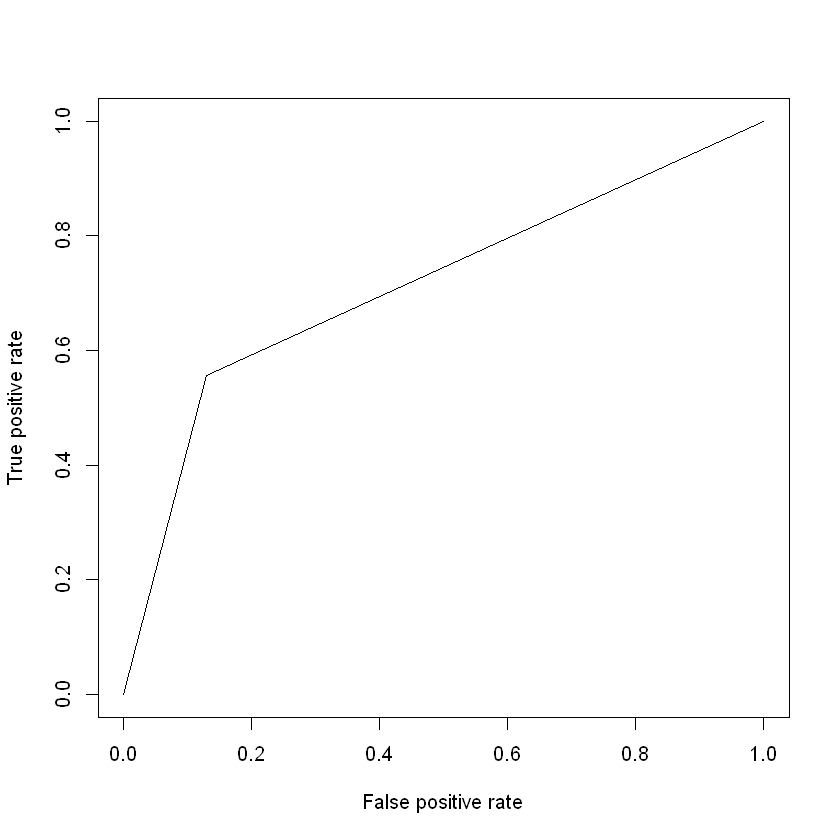

In [39]:
# we need to change our predicted data and actuak data into numeric format
pred_logistic <- as.numeric(improved_logistic_predict_2)
label_logistic <- as.numeric(testSet$credit_risk)

# we create a prediction object from our prediction and the actual data
roc_pred_logictic <- prediction(pred_logistic, label_logistic)

# we creat a performance object using our prediction object and pass arguments, tpr (true positive rate) and fpr (false positive rate)
roc_perf_logistic <- performance(roc_pred_logictic, 'tpr', 'fpr')

# we plot the ROC
plot(roc_perf_logistic)

# we show the AUC from the performance function
auc_logistic <- performance(roc_pred_logictic, 'auc')@y.values
paste('Improved Logistic Regression model AUC =', auc_logistic)

### Naive Bayes Model ROC Curve and AUC

[1] "Improved Naive Bayes model AUC = 0.72473169005779"

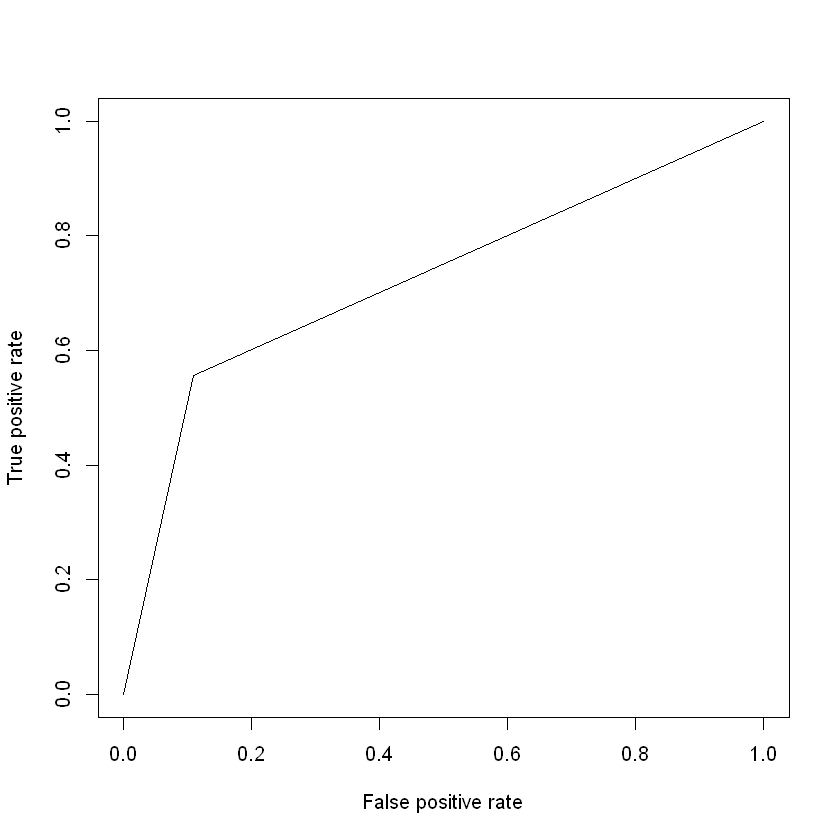

In [40]:
pred_nb <- as.integer(improved_nb_predict)
label_nb <- as.integer(testSet$credit_risk)
roc_pred_nb <- prediction(pred_nb, label_nb)
roc_perf_nb <- performance(roc_pred_nb, 'tpr', 'fpr')
plot(roc_perf_nb) 

auc_nb <- performance(roc_pred_nb, 'auc')@y.values
paste('Improved Naive Bayes model AUC =', auc_nb)

**Findings**

Impirically inspecting the ROC curves of both our logistic regression and naive bayes models, it is difficult to comapre which one has better performce.<br>
However, the AUC shows that naive bayes, with AUC = 0.725, has better performance than the logistic regression model, which has AUC = 0.714.<br>
We also see that before a certain theshold, both models make more true positive predictions than false positive ones, that is, the ratio of true positives over false positives is higher.<br>
Until reaching a threshold where the performance suddenly diminishes.<br>
Finally, we can also see from the ROC and AUC results that both models are better than a random classifier but still has room for improvement.

### Task 1.4
By default, there are approximately 30% bad customers in the data. We will downsample bad customers to only 30 in the training data, and build a logistic regression and a naive Bayes using the same predictors selected in (2). We will then plot the ROC curves and compute the AUC and explain the models' performance for imbalanced data.

### Logistic Regression with down sampled training data

In [41]:
# down sample bad customers from 30% to 30 in trainSet data

# we get the row numbers with credit risk equals 'Bad Credit Risk'
bad_risk_index <- which(trainSet$credit_risk == 'Bad Credit Risk')

# we get the number of samples we need to update to 'Bad Credit Risk'
n_samples_to_update <- sum(table(bad_risk_index)) - 30

# we create a new test dataset that has imbalanced data and will call it trainSet_imbalanced
# we randomly sample row numbers with 'Bad Credit Risk' in them and remove them fro the data set
# we use set.seed() so that our values don't change

set.seed(5197)
trainSet_imbalanced <- trainSet[-sample(bad_risk_index, n_samples_to_update),]

# we check that we only have 30 rows that has 'Bad Credit Risk'
sum(table(which(trainSet_imbalanced$credit_risk == 'Bad Credit Risk')))

[1] 30

In [42]:
# build logistic model based on variables above
improved_logistic_model_2 <- train(credit_risk ~ status_checking_acct + duration_months + credit_hist + purpose +
                                   credit_amt + savings_acct + employment + installment_rate + foreign_worker +
                                   other_debtors + liability_to_other_people,
                                   data = trainSet_imbalanced, method = 'glm', family = binomial)

# testing the model
improved_logistic_predict_2 <- predict(improved_logistic_model_2, newdata=testSet)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning mess

In [43]:
# compute the confusion matrix
confusion.matrix <- as.matrix(table('Actual'=testSet$credit_risk, 'Predicted' = improved_logistic_predict_2))
confusion.matrix

                  Predicted
Actual             Good Credit Risk Bad Credit Risk
  Good Credit Risk              136               3
  Bad Credit Risk                55               6

[1] "Improved Logistic Regression model AUC = 0.538388960962378"

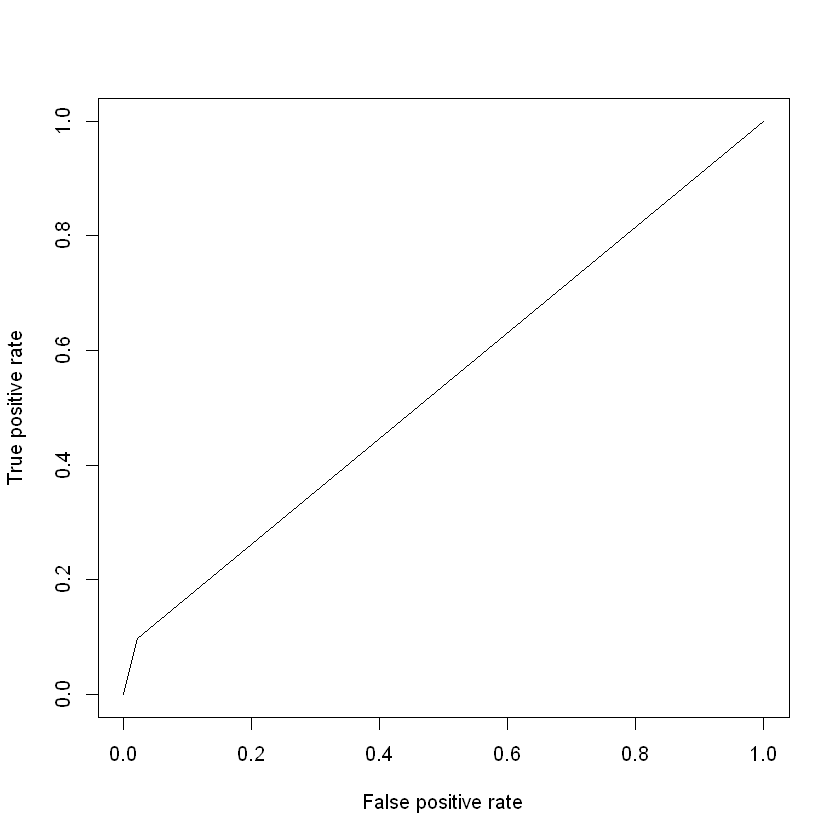

In [44]:
pred_logistic <- as.integer(improved_logistic_predict_2)
label_logistic <- as.integer(testSet$credit_risk)
roc_pred_logictic <- prediction(pred_logistic, label_logistic)
roc_perf_logistic <- performance(roc_pred_logictic, 'tpr', 'fpr')
plot(roc_perf_logistic)

auc_logistic <- performance(roc_pred_logictic, 'auc')@y.values
paste('Improved Logistic Regression model AUC =', auc_logistic)

### Naive Bayes with down sampled training data

In [45]:
# build and train the improved naive bayes model using selected features
improved_nb_model <- naiveBayes(credit_risk ~ status_checking_acct + duration_months + credit_hist + purpose +
                                credit_amt + savings_acct + employment + installment_rate,
                                data = trainSet_imbalanced)

# test our improved naive bayes model
improved_nb_predict <- predict(improved_nb_model, testSet)

In [46]:
# compute the confusion matrix
confusion.matrix <- as.matrix(table('Actual'=testSet$credit_risk, 'Predicted' = improved_nb_predict))
confusion.matrix

                  Predicted
Actual             Good Credit Risk Bad Credit Risk
  Good Credit Risk              134               5
  Bad Credit Risk                53               8

[1] "Improved Naive Bayes model AUC = 0.547588158981012"

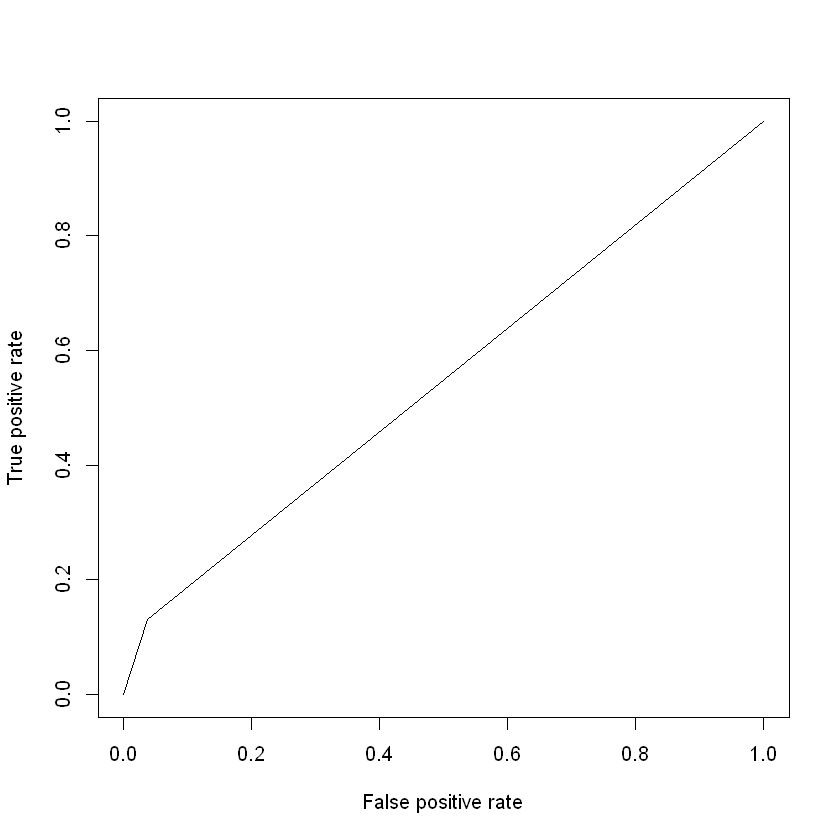

In [47]:
pred_nb <- as.integer(improved_nb_predict)
label_nb <- as.integer(testSet$credit_risk)
roc_pred_nb <- prediction(pred_nb, label_nb)
roc_perf_nb <- performance(roc_pred_nb, 'tpr', 'fpr')
plot(roc_perf_nb)

auc_nb <- performance(roc_pred_nb, 'auc')@y.values
paste('Improved Naive Bayes model AUC =', auc_nb)

** Models' performance for imbalanced data**

We see that with imbalanced data, both logistic regression and naive bayes models' performance went down to  just around 0.538 to 0.548 in terms of AUC, respectively.<br>
We also see that with imbalanced data, our models performs just a little bit better than a random classifier, whose AUC = 0.5.  
Finally, Looking at the confusion matrix, the imbalanced data turned both our models into very optimistic models that has high levels of false positives.<br>